# Inverted Pendulum: PID controller design

We will use the `control` module to implement our PID controller in python. We will design this controller around the linearized transfer function that we derived in `inverted_pendulum_modelling.ipynb`. First, the transfer function needs to be defined.

In [23]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

##################
###### VARS ######
##################

M = 0.3     # Mass of cart in kg
m = 0.1     # Mass of pendulum rod in kg
l = 0.35    # HALF-length of pendulum rod in m
g = 9.81    # gravitational constant in m/s²

##################
##################

c = 3/(l*(4*M+m))
print(c)
d = (3*(M+m)*g)/(l*(4*M+m))
print(d)

s = ctrl.TransferFunction.s
G_theta = -c/(s**2-d)

6.593406593406594
25.87252747252748


## System response

We will now determine the response of our system to various inputs.
First, we will verify the step and impulse responses we determined earlier.

### Impulse response

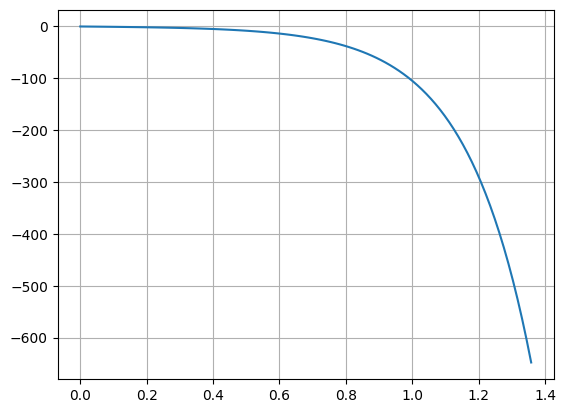

In [24]:
t_imp, x_imp = ctrl.impulse_response(G_theta)
plt.plot(t_imp, x_imp)
plt.grid(True)
plt.show()

### Step response

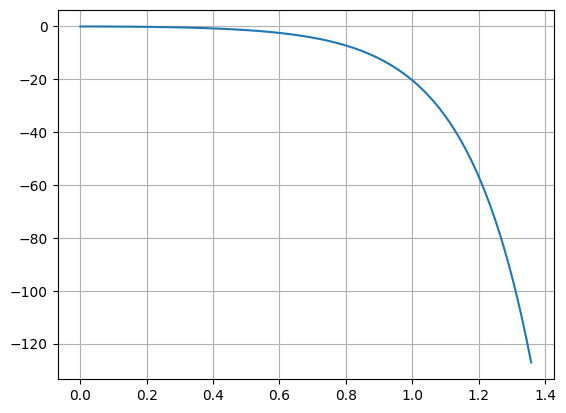

In [25]:
t_imp, x_imp = ctrl.step_response(G_theta)
plt.plot(t_imp, x_imp)
plt.grid(True)
plt.show()


### Frequency response
Now, we will take a look at an input of $u(t) = 0.05t^{1.8} \cos(t)$ for $ t \in [0, 0.1]s$.

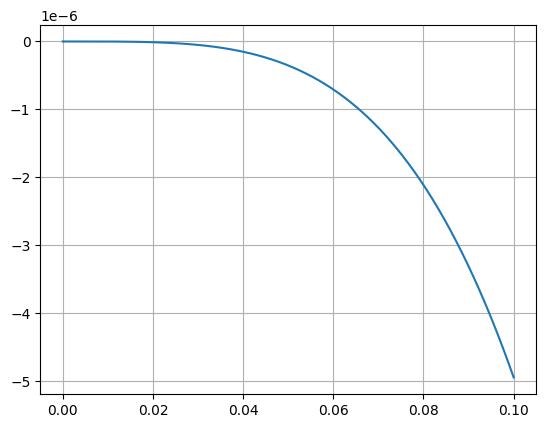

In [26]:
t_init = 0
t_final = 0.1
n_points = 1000

ts = np.linspace(t_init, t_final, n_points)
u = 0.05*ts**1.8*np.cos(ts)
resp = ctrl.forced_response(G_theta, ts, u)

plt.plot(resp.time, resp.outputs)
plt.grid(True)
plt.show()

## Designing a PID controller

We will try stabilizing our system using only proportional and derivative controller gains for now. For that, we will take a look at the step response of the closed loop system.

<TransferFunction>: sys[128]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       -6.593
--------------------
s^2 + 46.15 s + 1161



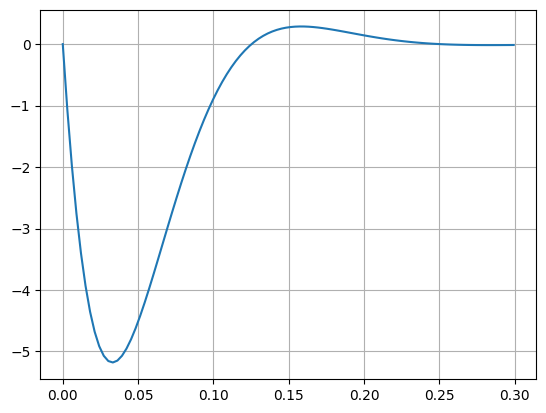

In [27]:
Kp = -180
Ki = 0
Kd = -7

G_c = Kp + Ki/s + Kd*s

G_load = ctrl.feedback(G_theta, G_c)
print(G_load)

t_imp, x_imp_rad = ctrl.impulse_response(G_load)
x_imp_deg = x_imp_rad * 180/np.pi
plt.plot(t_imp, x_imp_deg)
# plt.xlim([0, 10])
# plt.ylim([-50, 10])
plt.grid(True)
plt.show()

We are happy with a maximum error of just over $5^{\, \circ}$ and slight overshoot as well as a settling time of $<5$ s. Now, let's analyze the step response of the closed loop system.

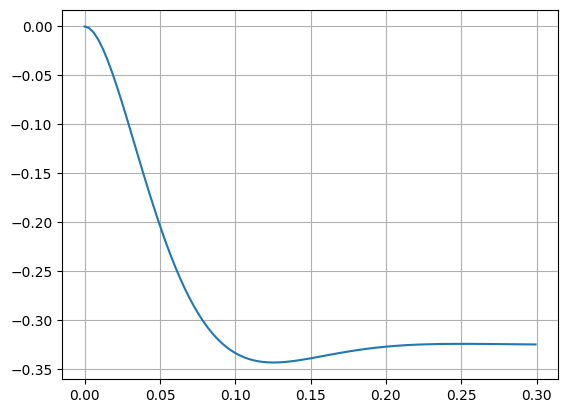

In [28]:
t_imp, x_imp_rad = ctrl.step_response(G_load)
x_imp_deg = x_imp_rad * 180/np.pi
plt.plot(t_imp, x_imp_deg)
# plt.xlim([0, 10])
# plt.ylim([-50, 10])
plt.grid(True)
plt.show()

The step response is entirely unsatisfactoy. If the pendulum track is not exactly horizontal, a constant Force will be acting on the cart, which will induce a steady state error until the pendulum runs into the end of the track and falls over. We need to incorporate integral gain to get rid of this behaviour.

<TransferFunction>: sys[140]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            -6.593 s
---------------------------------
s^3 + 164.8 s^2 + 501.6 s + 263.7



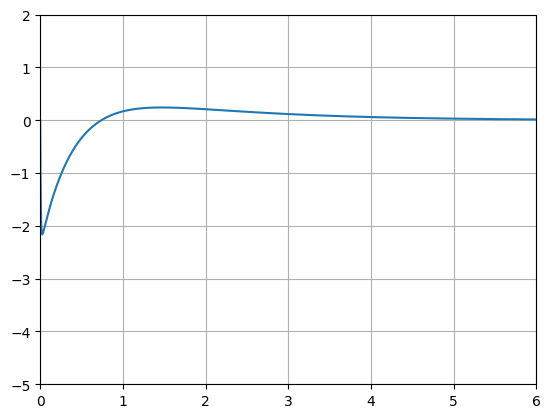

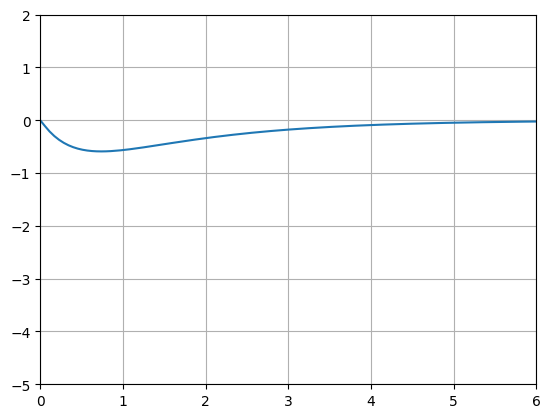

In [29]:
Kp = -80
Ki = -40
Kd = -25

G_c = Kp + Ki/s + Kd*s

G_load = ctrl.feedback(G_theta, G_c)
print(G_load)

t_imp, x_imp_rad = ctrl.impulse_response(G_load)
x_imp_deg = x_imp_rad * 180/np.pi
plt.plot(t_imp, x_imp_deg)
plt.xlim([0, 6])
plt.ylim([-5, 2])
plt.grid(True)
plt.show()

t_imp, x_imp_rad = ctrl.step_response(G_load)
x_imp_deg = x_imp_rad * 180/np.pi
plt.plot(t_imp, x_imp_deg)
plt.xlim([0, 6])
plt.ylim([-5, 2])
plt.grid(True)
plt.show()

